## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [12]:
import os
import numpy as np
import math
import numba
from numba import vectorize, int64, float32, jit, cuda

In [8]:
A = np.array([2,5,10,3,8], dtype=np.float32)

In [3]:
def log_funct(X):
    Y = np.log(X)
    return Y

print(log_funct(A))
%timeit log_funct(A)

[0.69314718 1.60943791 2.30258509 1.09861229 2.07944154]
9.21 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
from numba import vectorize, int64, float32, float64, cuda

@vectorize([float32(float32)], target='parallel', fastmath=True) 

def log_funct(X):
    Y = np.log(X)
    return Y

print(log_funct(A))
%timeit log_funct(A)

[0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
11.1 µs ± 452 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
def exp(x):
    y = np.exp(x)
    return y
print(exp(A))
%timeit exp(A)

[7.38905610e+00 1.48413159e+02 2.20264658e+04 2.00855369e+01
 2.98095799e+03]
8.49 µs ± 605 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
@vectorize([float32(float32)], target='parallel', fastmath=True) 
def exp(x):
    y = np.exp(x)
    return y

print(exp(A))
%timeit exp(A)

[7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]
11.4 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Exercise 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

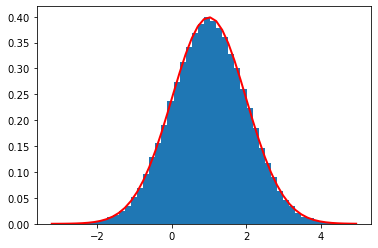

260 µs ± 35.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
68.4 µs ± 31.4 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
import matplotlib.pyplot as plt
mu = 1
sigma = 1
gausspdf = np.random.normal(mu,sigma,100000)
count, bins, _ = plt.hist(gausspdf, 50, density=True)
def pdf(mu, sigma, x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
plt.plot(bins, pdf(mu, sigma, bins), linewidth=2, color = 'r')
plt.show()
#value at x
@jit(nopython = True)
def pdf_jit(mu, sigma, x):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))
x = np.linspace(-3,3,10000)
%timeit pdf(x,1,1)
%timeit pdf_jit(x,1,1)

## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

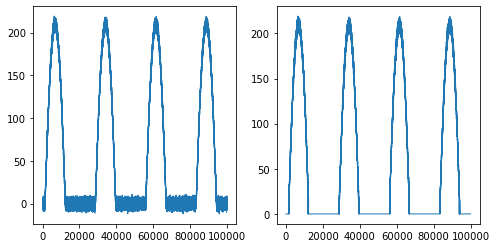

897 ms ± 29.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
47.4 µs ± 9.52 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.plot(data, linewidth = 1)
def zero_suppress(samples, threshold):
    for i in range(len(samples)):
        if samples[i] < threshold:
            if samples[i] > -threshold:
                samples[i] = 0
    return samples
@jit(nopython=True)
def zero_suppress_jit(samples, threshold):
    for i in range(len(samples)):
        if samples[i] < threshold:
            if samples[i] > -threshold:
                samples[i] = 0
    return samples

threshold = 15
data2 = data.copy()
data2 = zero_suppress(data2, threshold)
ax2.plot(data2, linewidth = 1)
plt.show()

%timeit zero_suppress(data,threshold)
%timeit zero_suppress_jit(data,threshold)

## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [23]:
X = np.random.rand(3,3)
Y = np.random.rand(3,3)
import math


def sigmoid_kernel(alpha,c,x,y):
    return np.tanh(alpha * np.dot(x.T, y) + c)

@jit#(nopython = True)
def sigmoid_kernel_jit(alpha,c,x,y):
    return np.tanh(alpha * np.dot(x.T, y) + c)


print(sigmoid_kernel(1,1,X,Y))
print(sigmoid_kernel_jit(1,1,X,Y))

%timeit sigmoid_kernel(1,1,X,Y)
%timeit sigmoid_kernel_jit(1,1,X,Y)


[[0.96399014 0.87984613 0.94551591]
 [0.98197189 0.90317903 0.98367218]
 [0.94860806 0.85746825 0.96670854]]
[[0.96399014 0.87984613 0.94551591]
 [0.98197189 0.90317903 0.98367218]
 [0.94860806 0.85746825 0.96670854]]
16.2 µs ± 470 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.74 µs ± 183 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

In [33]:
from numba import cuda

matrix = np.random.rand(256,256,256)
threadsperblock = (32, 32, 32)
blockspergrid_x = (matrix.shape[0] + (threadsperblock[0] - 1)) // threadsperblock[0]
blockspergrid_y = (matrix.shape[1] + (threadsperblock[1] - 1)) // threadsperblock[1]
blockspergrid_z = (matrix.shape[2] + (threadsperblock[2] - 1)) // threadsperblock[2]
blockspergrid = (blockspergrid_x, blockspergrid_y, blockspergrid_z)

@cuda.jit
def kernel_function(matrix):
    #thread id in 3D block
    tx = cuda.threadIdx.x
    ty = cuda.threadIdx.y
    tz = cuda.threadIdx.z
    
    #block id in 3D grid
    bx = cuda.blockIdx.x
    by = cuda.blockIdx.y
    bz = cuda.blockIdx.z
    
    #block width (no threads per block)
    bwx = cuda.blockDim.x
    bwy = cuda.blockDim.y
    bwz = cuda.blockDim.z
    
    #compute flattened index inside array 
    posx = tx + bx * bwx
    posy = ty + by * bwy
    posz = tz + bz * bwz
    
    if posx < matrix.shape[0]:
        if posy < matrix.shape[1]:
            if posz < matrix.shape[2]:
                matrix[posx, posy, posz] = np.cos(matrix[posx, posy, posz])
        
#start kernel
kernel_function[blockspergrid, threadsperblock](matrix)
    

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x12$

A and B must be randomly generated and only int values are allowed.


In [26]:
from __future__ import division
from numba import cuda
import numpy
import math

# complete the code
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp
    return C

# Initialize the data arrays
A = np.random.randint(-10,100, 24*12)
A = A.reshape(24,12)
#print(A)
B = np.random.randint(20, 60, 12*24)
B = B.reshape(12,24)
#print(B)
C = np.zeros(24*12)
C = C.reshape(24,12)


# Configure the blocks
threadsperblock = (16, 16)
blockspergrid_x = (C.shape[0] + (threadsperblock[0] - 1)) // threadsperblock[0]
blockspergrid_y = (C.shape[1] + (threadsperblock[1] - 1)) // threadsperblock[1]
blockspergrid = (blockspergrid_x, blockspergrid_y)

#start kernel
matmul[blockspergrid, threadsperblock](A, B, C)

#print result
print(C)


CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
: